In [12]:
import pandas as pd

# Load the uploaded CSV files
file_path_1 = '../Seed_Analysis0908_165315.csv'
file_path_2 = '../Seed_Analysis0908_165617.csv'


# Load both CSV files to check their contents
data_1 = pd.read_csv(file_path_1)
data_2 = pd.read_csv(file_path_2)

data = pd.concat([data_1, data_2], ignore_index=True)
data


,Seed,Size_Opt,Adj_Opt,Ori_Opt,Adjacency,Orientation,Size,Simplicity,Rectangularity,Regularity,PA Ratio,Weighted_Fitness
0,1,0,1,1,0.6,1.00,0.736111,0.791667,0.878472,0.548611,0.791420,0.702762
1,1,0,1,1,0.6,1.00,0.813768,0.812500,0.940625,0.596548,0.868066,0.719142
2,1,0,1,1,0.6,1.00,0.777778,0.683333,0.849132,0.655243,0.802892,0.711864
3,1,0,1,1,0.6,1.00,0.744444,0.833333,0.941667,0.667222,0.886357,0.704645
4,1,0,1,1,0.4,1.00,0.741363,0.633333,0.835417,0.574583,0.785104,0.544302
...,...,...,...,...,...,...,...,...,...,...,...,...
2371,14,1,1,0,0.2,0.75,0.802015,0.700000,0.845635,0.596620,0.788947,0.317960
2372,14,1,1,0,0.2,0.50,0.820679,0.812500,0.929762,0.798044,0.908194,0.302606
2373,14,1,1,0,0.4,0.50,0.866667,0.675000,0.862202,0.654348,0.817237,0.490566
2374,14,1,1,0,0.2,0.50,0.841667,0.791667,0.872470,0.613799,0.822128,0.303303


In [13]:

file_path_1 = '../Seed_Analysis0908_170848.csv'
data = pd.read_csv(file_path_1)
data.head()

,Seed,Size_Opt,Adj_Opt,Ori_Opt,Adjacency,Orientation,Size,Simplicity,Rectangularity,Regularity,PA Ratio,Weighted_Fitness
0,1,1,0,1,0.6,0.75,0.950000,0.704167,0.847202,0.590669,0.814972,0.699387
1,1,1,0,1,0.4,0.75,0.726881,0.770833,0.903646,0.589856,0.850938,0.518869
2,1,1,0,1,0.2,0.75,0.649573,0.660714,0.834722,0.552049,0.775651,0.310733
3,1,1,0,1,0.4,0.75,0.710606,0.687500,0.862798,0.578347,0.803490,0.516757
4,1,1,0,1,0.4,0.75,0.851515,0.658333,0.813839,0.607205,0.770944,0.532786


In [14]:
basic_stat = data.describe()
basic_stat

,Seed,Size_Opt,Adj_Opt,Ori_Opt,Adjacency,Orientation,Size,Simplicity,Rectangularity,Regularity,PA Ratio,Weighted_Fitness
count,9900.000000,9900.0,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9.900000e+03
mean,50.500000,1.0,0.520000,0.550000,0.453071,0.713207,0.755918,0.721018,0.860572,0.595262,0.800484,4.978152e-01
std,28.867528,0.0,0.499625,0.497519,0.194935,0.300799,0.130246,0.077782,0.049713,0.067629,0.049963,2.035223e-01
min,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.339312,0.483333,0.658048,0.360268,0.593904,2.000000e-09
25%,25.750000,1.0,0.000000,0.000000,0.400000,0.500000,0.658167,0.666667,0.827230,0.549833,0.766699,3.753512e-01
50%,50.500000,1.0,1.000000,1.000000,0.400000,0.750000,0.762563,0.716667,0.861644,0.594591,0.801796,5.254381e-01
75%,75.250000,1.0,1.000000,1.000000,0.600000,1.000000,0.861111,0.770833,0.895426,0.640195,0.836054,6.570404e-01
max,100.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.041915,0.869722,0.949926,1.000000e+00


In [17]:
import scipy.stats as stats
# 1. 정규성 검정 (Shapiro-Wilk Test)
w, p_value_normality = stats.shapiro(data['Weighted_Fitness'])
print(f'Shapiro-Wilk Test for Normality: p-value = {p_value_normality}')


Shapiro-Wilk Test for Normality: p-value = 0.0


C:\Anaconda\envs\deep\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [18]:

# 2. 분산 동질성 검정 (Levene Test)
# Seed별로 데이터를 그룹화해서 분산 검정을 진행
seed_groups = [data['Weighted_Fitness'][data['Seed'] == seed] for seed in data['Seed'].unique()]
w_levene, p_value_levene = stats.levene(*seed_groups)
print(f'Levene Test for Homogeneity of Variances: p-value = {p_value_levene}')


Levene Test for Homogeneity of Variances: p-value = 2.8466628945758915e-150


   Seed  Size_Opt  Adj_Opt  Ori_Opt  Adjacency  Orientation      Size  \
0     1         1        0        1        0.6         0.75  0.950000   
1     1         1        0        1        0.4         0.75  0.726881   
2     1         1        0        1        0.2         0.75  0.649573   
3     1         1        0        1        0.4         0.75  0.710606   
4     1         1        0        1        0.4         0.75  0.851515   

   Simplicity  Rectangularity  Regularity  PA Ratio  Weighted_Fitness  
0    0.704167        0.847202    0.590669  0.814972          0.699387  
1    0.770833        0.903646    0.589856  0.850938          0.518869  
2    0.660714        0.834722    0.552049  0.775651          0.310733  
3    0.687500        0.862798    0.578347  0.803490          0.516757  
4    0.658333        0.813839    0.607205  0.770944          0.532786  
Shapiro-Wilk Test for Normality: p-value = 0.0
Levene Test for Homogeneity of Variances: p-value = 2.8466628945758915e-150


C:\Anaconda\envs\deep\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


              sum_sq      df           F  PR(>F)
C(Seed)   230.520997    99.0  127.120599     0.0
Residual  179.508674  9800.0         NaN     NaN


<Figure size 2000x1600 with 0 Axes>

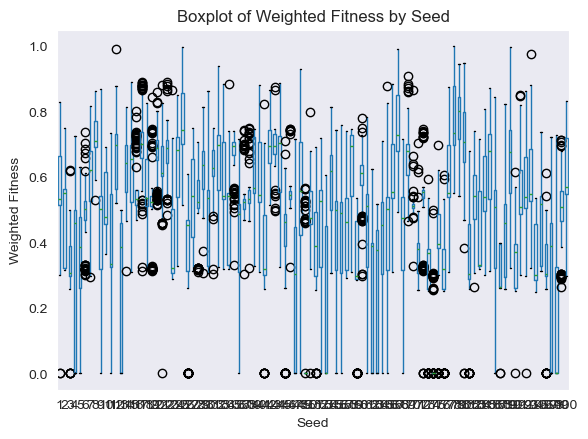

In [1]:
# 이 분석은 무의미함. 시드를 그룹화 할 수 없으므로
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# CSV 파일로부터 데이터 불러오기
file_path_1 = '../Seed_Analysis0908_170848.csv'
data = pd.read_csv(file_path_1)

# 데이터 확인
print(data.head())  # 데이터를 올바르게 불러왔는지 확인

# 1. 정규성 검정 (Shapiro-Wilk Test)
w, p_value_normality = stats.shapiro(data['Weighted_Fitness'])
print(f'Shapiro-Wilk Test for Normality: p-value = {p_value_normality}')

# 2. 분산 동질성 검정 (Levene Test)
# Seed별로 데이터를 그룹화해서 분산 검정을 진행
seed_groups = [data['Weighted_Fitness'][data['Seed'] == seed] for seed in data['Seed'].unique()]
w_levene, p_value_levene = stats.levene(*seed_groups)
print(f'Levene Test for Homogeneity of Variances: p-value = {p_value_levene}')

# 3. ANOVA 분석
# ANOVA 모델 생성 (Weighted_Fitness ~ Seed)
model = ols('Weighted_Fitness ~ C(Seed)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# ANOVA 결과 출력
print(anova_table)

# 4. 시각화 (박스 플롯)
plt.figure(figsize=(20, 16))
data.boxplot(column='Weighted_Fitness', by='Seed', grid=False)
plt.title('Boxplot of Weighted Fitness by Seed')
plt.suptitle('')  # 상단 타이틀 제거
plt.xlabel('Seed')
plt.ylabel('Weighted Fitness')
plt.show()


<Figure size 1200x800 with 0 Axes>

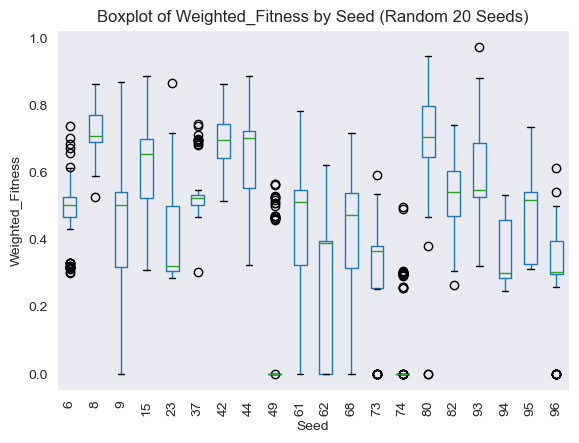

<Figure size 1200x800 with 0 Axes>

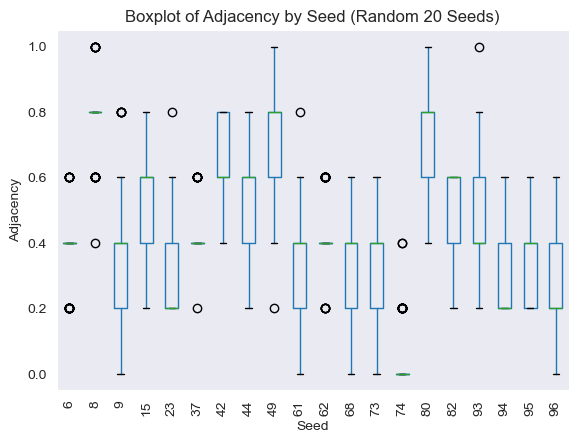

<Figure size 1200x800 with 0 Axes>

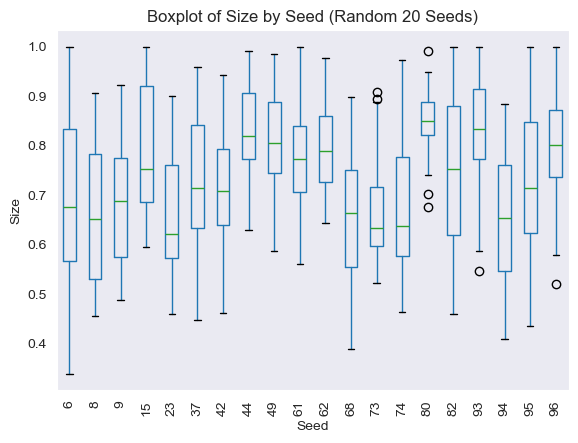

<Figure size 1200x800 with 0 Axes>

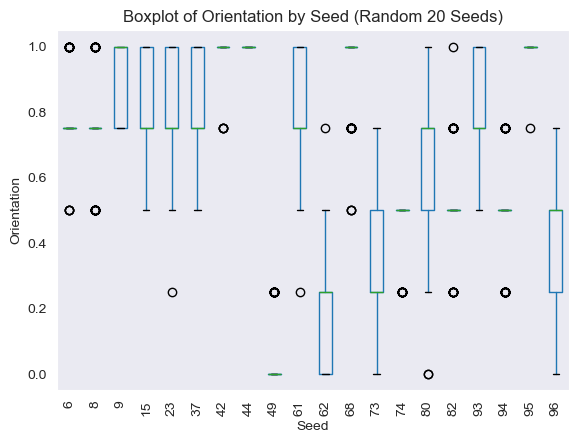

<Figure size 1200x800 with 0 Axes>

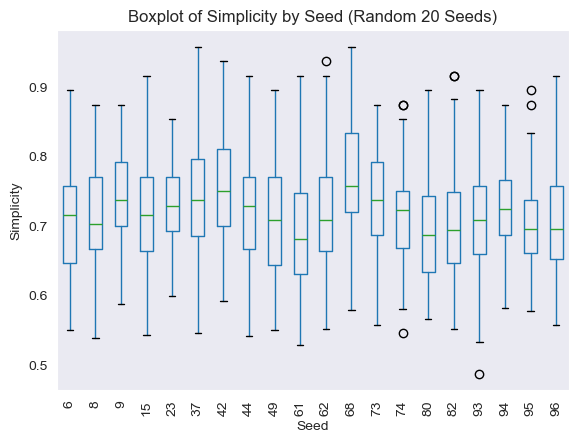

<Figure size 1200x800 with 0 Axes>

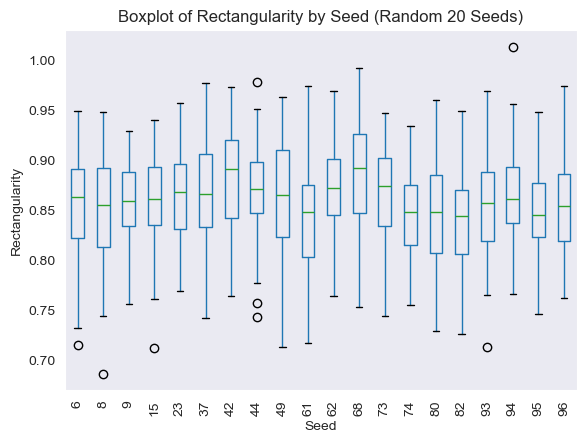

<Figure size 1200x800 with 0 Axes>

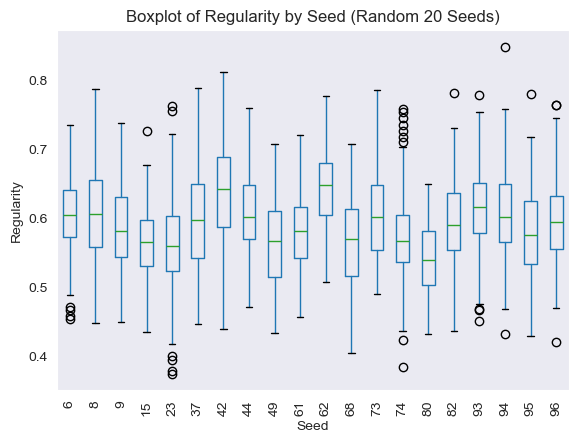

<Figure size 1200x800 with 0 Axes>

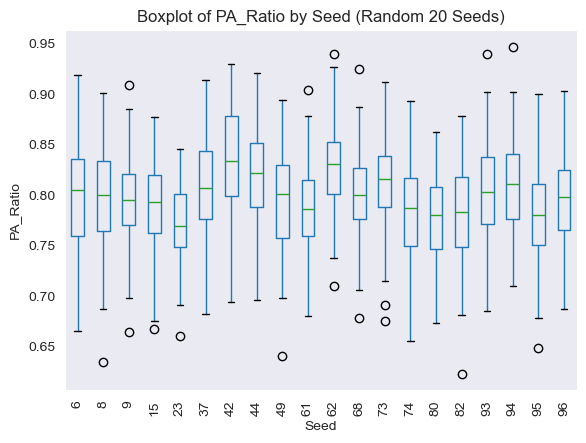

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 랜덤하게 20개의 시드 선택
random_seeds = np.random.choice(data['Seed'].unique(), size=20, replace=False)

# 2. 선택된 시드에 해당하는 데이터 필터링
filtered_data = data[data['Seed'].isin(random_seeds)]

# 3. 각 피트니스 지표별 박스 플롯 그리기
fitness_columns = ['Weighted_Fitness', 'Adjacency', 'Size', 'Orientation', 'Simplicity','Rectangularity', 'Regularity', 'PA_Ratio']

# 시각화를 위한 반복문
for fitness in fitness_columns:
    plt.figure(figsize=(12, 8))
    filtered_data.boxplot(column=fitness, by='Seed', grid=False)
    plt.title(f'Boxplot of {fitness} by Seed (Random 20 Seeds)')
    plt.suptitle('')  # 상단 타이틀 제거
    plt.xlabel('Seed')
    plt.ylabel(f'{fitness}')
    plt.xticks(rotation=90)  # 시드 번호가 많을 때 가독성 높이기 위해 X축 라벨 회전
    plt.show()


In [11]:
import pandas as pd


# 8번 시드의 데이터를 필터링
seed_8_data = data[data['Seed'] == 8]
seed_8_data


,Seed,Size_Opt,Adj_Opt,Ori_Opt,Adjacency,Orientation,Size,Simplicity,Rectangularity,Regularity,PA_Ratio,Weighted_Fitness
693,8,1,0,1,0.8,0.75,0.509463,0.812500,0.920238,0.673309,0.885193,0.690109
694,8,1,0,1,0.8,1.00,0.635808,0.687500,0.877455,0.666177,0.846223,0.788519
695,8,1,0,1,0.8,0.75,0.727607,0.729167,0.867659,0.619538,0.832401,0.768093
696,8,1,0,1,0.8,0.75,0.850657,0.539583,0.754094,0.585498,0.702746,0.798579
697,8,1,0,1,0.8,0.50,0.795196,0.594048,0.772113,0.574296,0.732404,0.694740
...,...,...,...,...,...,...,...,...,...,...,...,...
787,8,1,0,1,0.8,0.75,0.585663,0.716667,0.860417,0.567423,0.779886,0.721917
788,8,1,0,1,0.8,0.50,0.781746,0.666667,0.778853,0.572483,0.732039,0.692139
789,8,1,0,1,0.8,0.75,0.545971,0.695833,0.865278,0.609367,0.791446,0.706098
790,8,1,0,1,0.8,0.75,0.456667,0.716667,0.863393,0.646499,0.825071,0.664108


In [7]:
# 1. Adajcency 분산 동질성 검정 (Levene Test)

adjacency_seed_groups = [data['Adjacency'][data['Seed'] == seed] for seed in data['Seed'].unique()]
w_levene, p_value_levene = stats.levene(*adjacency_seed_groups)
print(f'Levene Test for Homogeneity of Variances for Adjacency: p-value = {p_value_levene}')

# ANOVA 분석
# ANOVA 모델 생성 (Adjacency ~ Seed)
model = ols('Adjacency ~ C(Seed)', data=data).fit()
adjacency_anova_table = sm.stats.anova_lm(model, typ=2)
# ANOVA 결과 출력
print(f'{adjacency_anova_table}\n')

size_seed_groups = [data['Size'][data['Seed'] == seed] for seed in data['Seed'].unique()]
w_levene, p_value_levene = stats.levene(*size_seed_groups)
print(f'Levene Test for Homogeneity of Variances for Size: p-value = {p_value_levene}')
model = ols('Size ~ C(Seed)', data=data).fit()
size_anova_table = sm.stats.anova_lm(model, typ=2)
# ANOVA 결과 출력
print(f'{size_anova_table}\n')

orientation_seed_groups = [data['Orientation'][data['Seed'] == seed] for seed in data['Seed'].unique()]
w_levene, p_value_levene = stats.levene(*orientation_seed_groups)
print(f'Levene Test for Homogeneity of Variances for Orientation: p-value = {p_value_levene}')
model = ols('Orientation ~ C(Seed)', data=data).fit()
orientation_anova_table = sm.stats.anova_lm(model, typ=2)
# ANOVA 결과 출력
print(f'{orientation_anova_table}\n')

simplicity_seed_groups = [data['Simplicity'][data['Seed']== seed] for seed in data['Seed'].unique()]
w_levene, p_value_levene = stats.levene(*simplicity_seed_groups)
print(f'Levene Test for Homogeneity of Variances for Simplicity: p-value = {p_value_levene}')
model = ols('Orientation ~ C(Seed)', data=data).fit()
simplicity_anova_table = sm.stats.anova_lm(model, typ=2)
# ANOVA 결과 출력
print(f'{simplicity_anova_table}\n')

regularity_seed_groups = [data['Regularity'][data['Seed']== seed] for seed in data['Seed'].unique()]
w_levene, p_value_levene = stats.levene(*regularity_seed_groups)
print(f'Levene Test for Homogeneity of Variances for Regularity: p-value = {p_value_levene}')
model = ols('Orientation ~ C(Seed)', data=data).fit()
regularity_anova_table = sm.stats.anova_lm(model, typ=2)
print(f'{regularity_anova_table}\n')


# 'PA Ratio' 컬럼을 'PARatio'로 변경
data.rename(columns={'PA Ratio': 'PA_Ratio'}, inplace=True)

pa_ratio_seed_groups = [data['PA_Ratio'][data['Seed']== seed] for seed in data['Seed'].unique()]
w_levene, p_value_levene = stats.levene(*pa_ratio_seed_groups)
print(f'Levene Test for Homogeneity of Variances for PA_Ratio: p-value = {p_value_levene}')
model = ols('PA_Ratio ~ C(Seed)', data=data).fit()
pa_ratio_anova_table = sm.stats.anova_lm(model, typ=2)
print(f'{pa_ratio_anova_table}\n')


# ANOVA 결과 출력

Levene Test for Homogeneity of Variances for Adjacency: p-value = 7.610132040387366e-127
              sum_sq      df           F  PR(>F)
C(Seed)   193.195034    99.0  104.526607     0.0
Residual  182.961616  9800.0         NaN     NaN

Levene Test for Homogeneity of Variances for Size: p-value = 3.432866292693868e-181
              sum_sq      df          F  PR(>F)
C(Seed)    37.362363    99.0  28.327048     0.0
Residual  130.564137  9800.0        NaN     NaN

Levene Test for Homogeneity of Variances for Orientation: p-value = 1.603321539300966e-308
              sum_sq      df           F  PR(>F)
C(Seed)   750.920777    99.0  513.566559     0.0
Residual  144.739899  9800.0         NaN     NaN

Levene Test for Homogeneity of Variances for Simplicity: p-value = 3.900906313212099e-12
              sum_sq      df           F  PR(>F)
C(Seed)   750.920777    99.0  513.566559     0.0
Residual  144.739899  9800.0         NaN     NaN

Levene Test for Homogeneity of Variances for Regularity: p

결과를 해석하는 방법을 단계별로 설명드리겠습니다.

### 1. **Shapiro-Wilk Test for Normality**
```plaintext
Shapiro-Wilk Test for Normality: p-value = 0.0
```
- **Shapiro-Wilk Test**는 데이터가 정규분포를 따르는지 확인하는 검정입니다.
- **p-value = 0.0**은 매우 작은 값으로, 귀무 가설(데이터가 정규분포를 따른다)을 기각할 수 있습니다. 이는 **Weighted_Fitness** 값이 정규분포를 따르지 않는다는 의미입니다. ==> 그러나 샘플 사이즈가 5000을 초과하므로 이 p-value는 정확하지 않음.
- 일반적으로 ANOVA는 정규분포를 가정하지만, 데이터가 크거나 정규성이 아주 엄격하지 않다면 ANOVA는 여전히 유용할 수 있습니다. 다만, 정규성을 완전히 따르지 않는다는 점을 고려해야 합니다.

### 2. **Levene Test for Homogeneity of Variances**
```plaintext
Levene Test for Homogeneity of Variances: p-value = 2.8466628945758915e-150
```
- **Levene Test**는 그룹 간의 분산이 동일한지 확인하는 검정입니다.
- p-value가 매우 작은 값이므로, 귀무 가설(그룹 간의 분산이 동일하다)을 기각할 수 있습니다. 즉, **Seed** 그룹 간에 **Weighted_Fitness**의 분산이 동일하지 않다는 의미입니다.
- 분산 동질성이 만족되지 않으면, ANOVA의 결과가 왜곡될 가능성이 있습니다. 이 경우 **Welch’s ANOVA** 또는 **비모수 검정**을 고려할 수 있습니다.

### 3. **ANOVA 결과**
```plaintext
              sum_sq      df           F  PR(>F)
C(Seed)   230.520997    99.0  127.120599     0.0
Residual  179.508674  9800.0         NaN     NaN
```
- **C(Seed)** 행의 결과가 시드가 **Weighted_Fitness**에 미치는 영향을 나타냅니다.
- **F 값(F-statistic) = 127.12**은 매우 큰 값으로, 그룹 간 변동이 그룹 내 변동에 비해 매우 크다는 것을 의미합니다.
- **p-value(PR(>F)) = 0.0**은 매우 작은 값이므로, 귀무 가설(시드가 Weighted_Fitness에 영향을 미치지 않는다)을 기각할 수 있습니다. 즉, 시드가 **Weighted_Fitness**에 유의미한 영향을 미친다는 결론을 내릴 수 있습니다.

### 4. **시각화**
- 그래프가 포함되지 않았지만, **박스 플롯(box plot)**을 통해 시드별 **Weighted_Fitness**의 분포를 시각적으로 비교할 수 있습니다. 시드별로 분포가 차이가 크다면, 시드가 **Weighted_Fitness**에 큰 영향을 미친다는 것을 더 직관적으로 확인할 수 있습니다.

### 5. **경고 메시지**
```plaintext
UserWarning: p-value may not be accurate for N > 5000.
```
- 이는 샘플 크기가 5000을 초과할 때 Shapiro-Wilk Test의 p-value가 정확하지 않을 수 있음을 경고하는 메시지입니다.
- Shapiro-Wilk Test는 큰 샘플에 대해 더 이상 효과적이지 않으며, 다른 정규성 검정(예: Kolmogorov-Smirnov Test)을 사용할 수 있지만, 데이터가 매우 클 때는 정규성 검정을 생략하는 경우도 많습니다.

### 6. **해석 요약**
- **정규성**: 데이터가 정규분포를 따르지 않지만, 큰 샘플의 경우 ANOVA를 적용할 수 있습니다.
- **분산 동질성**: 시드 간의 분산이 동일하지 않으므로, Welch’s ANOVA 또는 비모수 검정을 고려할 수 있습니다.
- **ANOVA 결과**: 시드가 **Weighted_Fitness**에 유의미한 영향을 미친다고 결론을 내릴 수 있습니다.
- **추가 분석**: 시드 간에 어떤 그룹이 유의미한 차이를 보이는지 분석하기 위해 **Tukey's HSD** 같은 사후 분석을 수행할 수 있습니다.

이 결과를 바탕으로, 시드가 플로어플랜의 **Weighted_Fitness**에 영향을 미친다는 결론을 도출할 수 있으며, 추가적으로 사후 분석을 통해 어느 시드 그룹이 유의미하게 차이가 나는지 분석할 수 있습니다.

100개의 시드가 각각 다른 플로어플랜을 생성하고, 각 플로어플랜의 **Weighted_Fitness** 값을 비교하고자 한다면, 시드 간에 **Weighted_Fitness** 분포가 유의미하게 다른지 통계적으로 분석할 수 있습니다.

시드를 단순한 그룹으로 나누어 비교하는 것은 적합하지 않으므로, 각 시드에서 생성된 **Weighted_Fitness** 값의 분포가 다른 시드와 통계적으로 유의미하게 차이가 나는지를 검정하기 위해 적합한 통계적 기법을 사용할 수 있습니다.

### 여러 그룹(시드) 간 분포 차이를 확인하는 방법

1. **Kruskal-Wallis H Test**: 
   - 여러 그룹(여기서는 시드)의 분포가 동일한지 비교하는 비모수 검정입니다. 데이터가 정규분포를 따르지 않거나 분산이 동일하지 않다고 가정할 때 사용하는 방법으로, **Kruskal-Wallis Test**는 여러 그룹의 차이를 비교하는 데 적합합니다.
   - 이 검정을 통해 전체 시드들 간에 **Weighted_Fitness** 값의 분포가 유의미하게 다른지 확인할 수 있습니다.

2. **사후 검정 (Post-hoc Analysis)**: 
   - 만약 **Kruskal-Wallis Test**에서 시드 간에 유의미한 차이가 있다고 나오면, **Dunn’s Test** 같은 사후 분석 방법을 통해 어떤 시드 간에 차이가 있는지를 구체적으로 알아볼 수 있습니다.

### 1. Kruskal-Wallis H Test를 사용한 모든 시드 간 비교

```python
import pandas as pd
import scipy.stats as stats

# CSV 파일로부터 데이터 불러오기
file_path_1 = '../Seed_Analysis0908_170848.csv'
data = pd.read_csv(file_path_1)

# Kruskal-Wallis H Test (모든 시드 간 Weighted_Fitness 차이 분석)
kruskal_stat, p_value_kruskal = stats.kruskal(
    *[data[data['Seed'] == seed]['Weighted_Fitness'] for seed in data['Seed'].unique()]
)

# Kruskal-Wallis Test 결과 출력
print(f"Kruskal-Wallis Test: H-statistic = {kruskal_stat}, p-value = {p_value_kruskal}")
```

### 2. Kruskal-Wallis Test 결과 해석
- **p-value**가 0.05보다 작으면, 모든 시드의 **Weighted_Fitness** 값들 간에 유의미한 차이가 있다고 해석할 수 있습니다.
- **p-value**가 0.05보다 크면, 시드 간의 **Weighted_Fitness** 값에 유의미한 차이가 없다고 결론지을 수 있습니다.

### 3. 사후 분석 (Post-hoc Analysis)
만약 Kruskal-Wallis Test에서 유의미한 차이가 발견되었다면, 어느 시드 간에 차이가 나는지를 더 구체적으로 확인하기 위해 **Dunn’s Test** 같은 사후 검정을 사용할 수 있습니다. Python에서는 `scikit-posthocs` 라이브러리를 통해 이 작업을 수행할 수 있습니다.

```python
import scikit_posthocs as sp
import pandas as pd

# CSV 파일로부터 데이터 불러오기
file_path_1 = '../Seed_Analysis0908_170848.csv'
data = pd.read_csv(file_path_1)

# Dunn's test for post-hoc analysis after Kruskal-Wallis Test
dunn_result = sp.posthoc_dunn(data, val_col='Weighted_Fitness', group_col='Seed', p_adjust='bonferroni')

# Dunn's Test 결과 출력
print(dunn_result)
```

### 4. 해석 방법
- **Kruskal-Wallis H Test** 결과에서 p-value가 유의미할 경우, Dunn’s Test를 통해 어느 시드 간에 차이가 있는지 더 구체적으로 파악할 수 있습니다.
- Dunn’s Test 결과는 각 시드 간의 **p-value**를 보여줍니다. 이 값이 0.05보다 작은 시드 쌍들은 유의미한 차이를 보입니다.

### 5. 결론

1. **Kruskal-Wallis H Test**를 통해, 100개의 시드에서 생성된 **Weighted_Fitness** 값들 간에 분포 차이가 있는지 확인할 수 있습니다.
2. **Dunn’s Test**와 같은 사후 검정을 통해, 구체적으로 어떤 시드들이 유의미한 차이를 보이는지를 확인할 수 있습니다.

이러한 분석을 통해, 시드 간에 **Weighted_Fitness**가 어떻게 다른지 더 명확하게 확인할 수 있을 것입니다.

In [24]:
import pandas as pd
import scipy.stats as stats

# CSV 파일로부터 데이터 불러오기
file_path_1 = '../Seed_Analysis0908_170848.csv'
data = pd.read_csv(file_path_1)

# Kruskal-Wallis H Test (모든 시드 간 Weighted_Fitness 차이 분석)
kruskal_stat, p_value_kruskal = stats.kruskal(
    *[data[data['Seed'] == seed]['Weighted_Fitness'] for seed in data['Seed'].unique()]
)

# Kruskal-Wallis Test 결과 출력
print(f"Kruskal-Wallis Test: H-statistic = {kruskal_stat}, p-value = {p_value_kruskal}")


Kruskal-Wallis Test: H-statistic = 5873.644860096127, p-value = 0.0


In [27]:
!pip install scikit-posthocs


  Obtaining dependency information for scikit-posthocs from https://files.pythonhosted.org/packages/7e/8f/a4d9542ea371be2a71abd4100e646cfc957d20871c4bc571b5f1d5d662c1/scikit_posthocs-0.9.0-py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import scikit_posthocs as sp
import pandas as pd

# CSV 파일로부터 데이터 불러오기
file_path_1 = '../Seed_Analysis0908_170848.csv'
data = pd.read_csv(file_path_1)

# Dunn's test for post-hoc analysis after Kruskal-Wallis Test
dunn_result = sp.posthoc_dunn(data, val_col='Weighted_Fitness', group_col='Seed', p_adjust='bonferroni')

# Dunn's Test 결과 출력
print(dunn_result)


              1             2             3             4             5    \
1    1.000000e+00  1.000000e+00  1.756090e-12  3.549147e-04  4.441693e-10   
2    1.000000e+00  1.000000e+00  2.563405e-10  9.530166e-03  4.219273e-08   
3    1.756090e-12  2.563405e-10  1.000000e+00  1.000000e+00  1.000000e+00   
4    3.549147e-04  9.530166e-03  1.000000e+00  1.000000e+00  1.000000e+00   
5    4.441693e-10  4.219273e-08  1.000000e+00  1.000000e+00  1.000000e+00   
..            ...           ...           ...           ...           ...   
96   5.103029e-13  8.161194e-11  1.000000e+00  1.000000e+00  1.000000e+00   
97   3.766524e-10  3.625980e-08  1.000000e+00  1.000000e+00  1.000000e+00   
98   4.474209e-22  2.780920e-19  1.000000e+00  1.604340e-03  1.000000e+00   
99   1.000000e+00  1.000000e+00  7.523284e-06  1.000000e+00  4.491417e-04   
100  4.456119e-02  2.015296e-03  1.143159e-32  4.276737e-19  6.216233e-29   

              6             7             8             9             10   

In [29]:

# 각 시드별 Weighted_Fitness의 기본 통계 및 평균값 계산

# 각 시드별로 Weighted_Fitness의 기본 통계를 계산합니다.
seed_grouped_stats = data.groupby('Seed')['Weighted_Fitness'].describe()

# 평균값을 확인하기 위해 각 시드별 평균 추가
seed_grouped_mean = data.groupby('Seed')['Weighted_Fitness'].mean()
seed_grouped_stat = data.groupby('Seed')['Weighted_Fitness'].mean()
seed_grouped_stats, seed_grouped_mean

(      count      mean       std           min           25%           50%  \
 Seed                                                                        
 1      99.0  0.533513  0.149032  2.000000e-09  5.132269e-01  5.327856e-01   
 2      99.0  0.497144  0.147587  3.150976e-01  3.218582e-01  5.525292e-01   
 3      99.0  0.337020  0.112753  2.000000e-09  2.985675e-01  3.057506e-01   
 4      99.0  0.359277  0.235298  4.000000e-09  4.000000e-09  4.604732e-01   
 5      99.0  0.355636  0.144256  2.000000e-09  2.595029e-01  3.848874e-01   
 ...     ...       ...       ...           ...           ...           ...   
 96     99.0  0.321298  0.135348  2.000000e-09  2.985861e-01  3.047390e-01   
 97     99.0  0.281585  0.221817  4.000000e-09  4.000000e-09  3.895748e-01   
 98     99.0  0.124395  0.176455  2.000000e-09  2.000000e-09  2.000000e-09   
 99     99.0  0.494964  0.109862  2.623896e-01  4.650237e-01  5.092648e-01   
 100    99.0  0.625454  0.100494  2.967833e-01  5.489134e-01  5.

C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


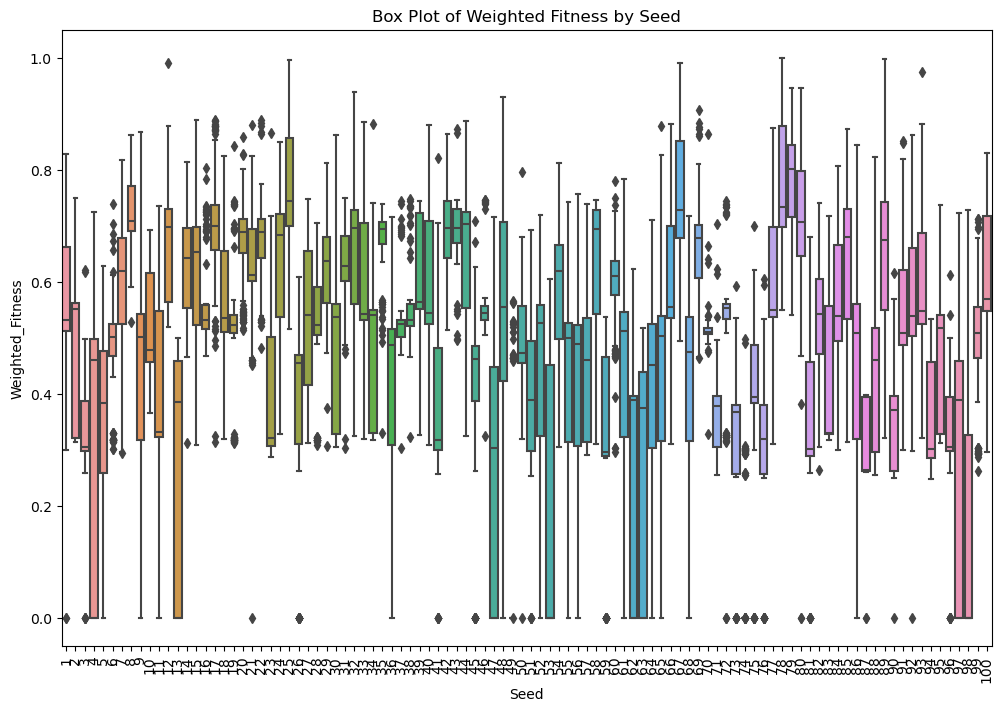

In [31]:
import seaborn as sns
# 2. 시드별 Weighted_Fitness 박스 플롯
plt.figure(figsize=(12, 8))
sns.boxplot(x='Seed', y='Weighted_Fitness', data=data)
plt.xticks(rotation=90)
plt.title('Box Plot of Weighted Fitness by Seed')
plt.show()


C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


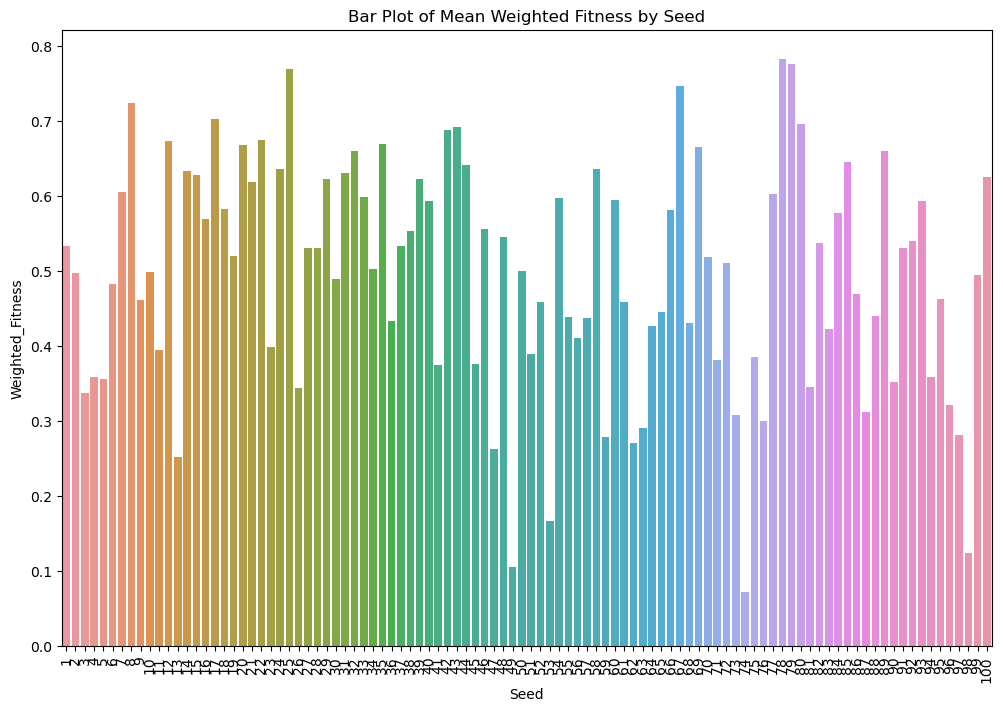

In [32]:
# 3. 시드별 평균 Weighted_Fitness 막대 그래프
seed_mean_fitness = data.groupby('Seed')['Weighted_Fitness'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Seed', y='Weighted_Fitness', data=seed_mean_fitness)
plt.xticks(rotation=90)
plt.title('Bar Plot of Mean Weighted Fitness by Seed')
plt.show()


#  Simplicity, Rectangularity, Regularity, PA Ratio의 상관관계

Simplicity vs Rectangularity: Correlation = 0.849, p-value = 0.000
Simplicity vs Regularity: Correlation = 0.179, p-value = 0.000
Simplicity vs PA Ratio: Correlation = 0.709, p-value = 0.000
Rectangularity vs Simplicity: Correlation = 0.849, p-value = 0.000
Rectangularity vs Regularity: Correlation = 0.283, p-value = 0.000
Rectangularity vs PA Ratio: Correlation = 0.836, p-value = 0.000
Regularity vs Simplicity: Correlation = 0.179, p-value = 0.000
Regularity vs Rectangularity: Correlation = 0.283, p-value = 0.000
Regularity vs PA Ratio: Correlation = 0.629, p-value = 0.000
PA Ratio vs Simplicity: Correlation = 0.709, p-value = 0.000
PA Ratio vs Rectangularity: Correlation = 0.836, p-value = 0.000
PA Ratio vs Regularity: Correlation = 0.629, p-value = 0.000


C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

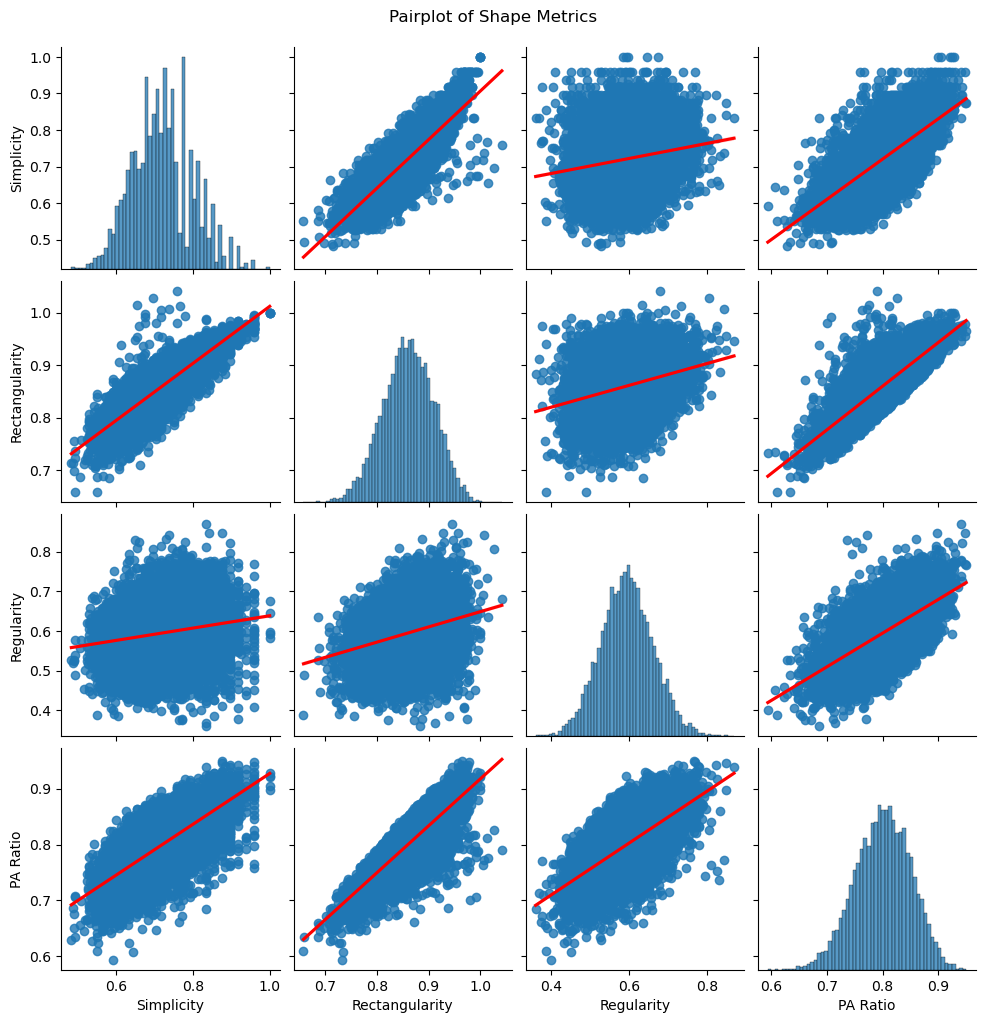

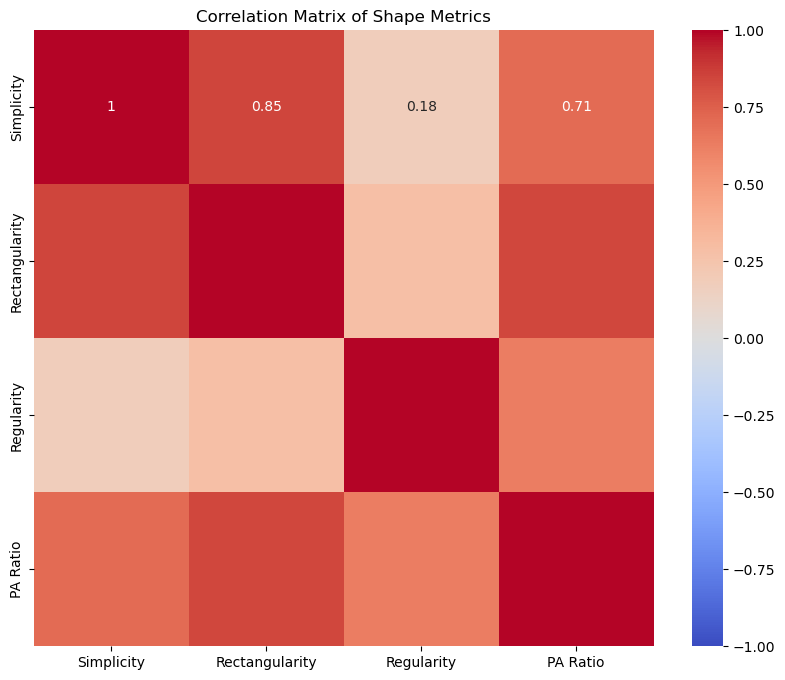

                Simplicity  Rectangularity  Regularity  PA Ratio
Simplicity        1.000000        0.849334    0.178888  0.709285
Rectangularity    0.849334        1.000000    0.282634  0.836220
Regularity        0.178888        0.282634    1.000000  0.628862
PA Ratio          0.709285        0.836220    0.628862  1.000000


In [53]:
import pandas as pd
# 형상 관련 지표들의 상관관계 계산

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

shape_metrics = data[['Simplicity', 'Rectangularity', 'Regularity', 'PA Ratio']]
# 1. 각 지표 간 상관계수 및 p-value 계산
correlations = {}
for col1 in shape_metrics.columns:
    for col2 in shape_metrics.columns:
        if col1 != col2:
            corr, p_value = pearsonr(shape_metrics[col1], shape_metrics[col2])
            correlations[f'{col1} vs {col2}'] = {'Correlation': corr, 'p-value': p_value}

# 상관계수 및 p-value 출력
for pair, stats in correlations.items():
    print(f"{pair}: Correlation = {stats['Correlation']:.3f}, p-value = {stats['p-value']:.3f}")

# 2. 형상 관련 지표 간 상관관계 매트릭스 계산
correlation_matrix = shape_metrics.corr()

# 3. 그래프 그리기 (Pairplot)
sns.pairplot(shape_metrics, kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Pairplot of Shape Metrics', y=1.02)
plt.show()

# 4. 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Shape Metrics')
plt.show()


correlation_matrix = shape_metrics.corr()

# 상관관계 출력
print(correlation_matrix)


In [54]:
data['Simplicity'].describe()

count    9900.000000
mean        0.721018
std         0.077782
min         0.483333
25%         0.666667
50%         0.716667
75%         0.770833
max         1.000000
Name: Simplicity, dtype: float64

C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


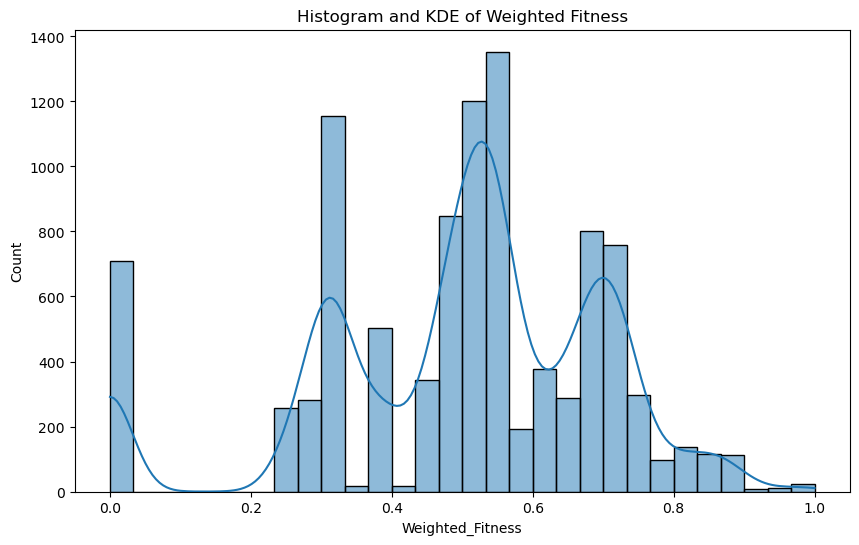

In [33]:
# 4. 전체 시드의 Weighted_Fitness 히스토그램 및 KDE
plt.figure(figsize=(10, 6))
sns.histplot(data['Weighted_Fitness'], kde=True, bins=30)
plt.title('Histogram and KDE of Weighted Fitness')
plt.show()

# 평균 Weighted_Fitness가 0.9 이상인 시드의 개수

1. 시드별로 평균 계산: 먼저 각 시드의 평균 Weighted_Fitness 값을 계산
2. 조건 필터링: 평균 Weighted_Fitness 값이 0.9 이상인 시드를 필터링
3. 갯수 계산: 필터링된 시드의 개수를 계산

In [41]:
import pandas as pd
# 2. 시드별로 평균 Weighted_Fitness 계산
seed_mean_fitness = data.groupby('Seed')['Weighted_Fitness'].mean()

# 3. 평균 Weighted_Fitness가 0.9 이상인 시드 필터링
high_fitness_seeds = seed_mean_fitness[seed_mean_fitness >= 0.8]

# 4. 평균이 0.9 이상인 시드의 개수 출력
print(f"평균 Weighted_Fitness가 0.9 이상인 시드의 개수: {len(high_fitness_seeds)}")


평균 Weighted_Fitness가 0.9 이상인 시드의 개수: 0


In [42]:
# 2. Weighted_Fitness가 0.9 이상인 항목 필터링
filtered_data = data[data['Weighted_Fitness'] >= 0.9]

# 3. 시드별로 그룹화하여 개수 세기
seed_count = filtered_data.groupby('Seed').size()

# 4. 결과 출력
print(seed_count)

Seed
12     1
25    11
32     1
48     1
67     9
69     1
78     9
79     8
80     1
89     2
93     1
dtype: int64


In [15]:
# 2. Adjacency 값이 1인 항목 필터링
filtered_data_Adjacency = data[data['Adjacency'] == 1]
filtered_data_Size = data[data['Size'] == 1]
filtered_data_Orientation = data[data['Orientation'] == 1]
filtered_data_Simplicity = data[data['Simplicity'] == 1]

# 3. 시드별로 그룹화하여 개수 세기
seed_count_Adjacency_perfect_score    = filtered_data_Adjacency.groupby('Seed').size()
seed_count_Size_perfect_score         = filtered_data_Size.groupby('Seed').size()
seed_count_Orientation_perfect_score  = filtered_data_Orientation.groupby('Seed').size()
seed_count_Simplicity_perfect_score   = filtered_data_Simplicity.groupby('Seed').size()

# 4. 결과 출력
print(f'Seed for perfect_Adjacency_score: \n {seed_count_Adjacency_perfect_score}')
print(f'Seed for perfect_Size_score: \n {seed_count_Size_perfect_score}')
print(f'Seed for perfect_Orientation_score: \n {seed_count_Orientation_perfect_score}')
print(f'Seed for perfect_Simplicity_score: \n {seed_count_Simplicity_perfect_score}')

Seed for perfect_Adjacency_score: 
 Seed
8      7
12     1
25    11
31     9
32     1
48     1
49    21
53     4
54     1
67     9
69     8
78     9
79    12
80     2
88     1
89     2
93     1
dtype: int64
Seed for perfect_Size_score: 
 Seed
2     1
6     1
7     1
10    1
11    1
13    2
15    4
17    1
20    1
21    2
22    2
27    1
28    2
29    2
30    2
31    2
33    3
45    1
47    2
50    1
52    2
54    4
55    1
60    1
61    1
63    1
69    1
78    3
79    2
82    3
83    2
84    1
86    1
88    1
93    1
95    1
96    3
98    2
dtype: int64
Seed for perfect_Orientation_score: 
 Seed
1      17
2      99
6      14
7       8
8      17
       ..
92     83
93     49
95     98
98     96
100    92
Length: 69, dtype: int64
Seed for perfect_Simplicity_score: 
 Seed
21    1
36    2
81    2
dtype: int64


1. 시드와 만점 겹침 여부 확인
시드별로 각 적합성(예: Weighted_Fitness, Adjacency, Size)에서 만점을 받은 시드가 있는지를 확인하고, 만점을 받은 시드가 다른 적합성 점수에서 높은지 확인하는 코드

In [50]:
import pandas as pd

# CSV 파일 불러오기
# 1. 적합성에서 만점(예: 1.0)을 받은 항목 필터링
perfect_score_seeds = data[data['Weighted_Fitness'] == 1]['Seed'].unique()
data[data['Weighted_Fitness']==1]


,Seed,Size_Opt,Adj_Opt,Ori_Opt,Adjacency,Orientation,Size,Simplicity,Rectangularity,Regularity,PA Ratio,Weighted_Fitness
7694,78,1,0,1,1.0,1.0,1.0,0.708333,0.816597,0.632855,0.790311,1.0


In [ ]:

# 다른 적합성(Adjacency, Size 등)에서 해당 시드의 점수가 높은지 확인
high_scores = data[data['Seed'].isin(perfect_score_seeds)]

# 2. 결과 출력
print(f"Weighted_Fitness에서 만점을 받은 시드들: {perfect_score_seeds}")
print(high_scores)

C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


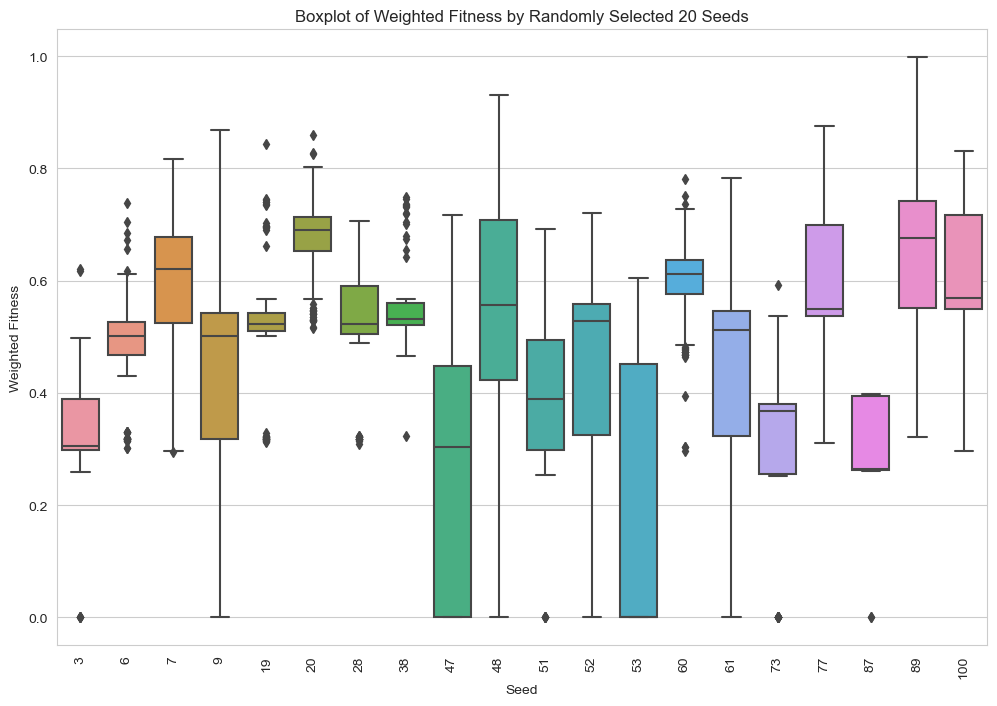

C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


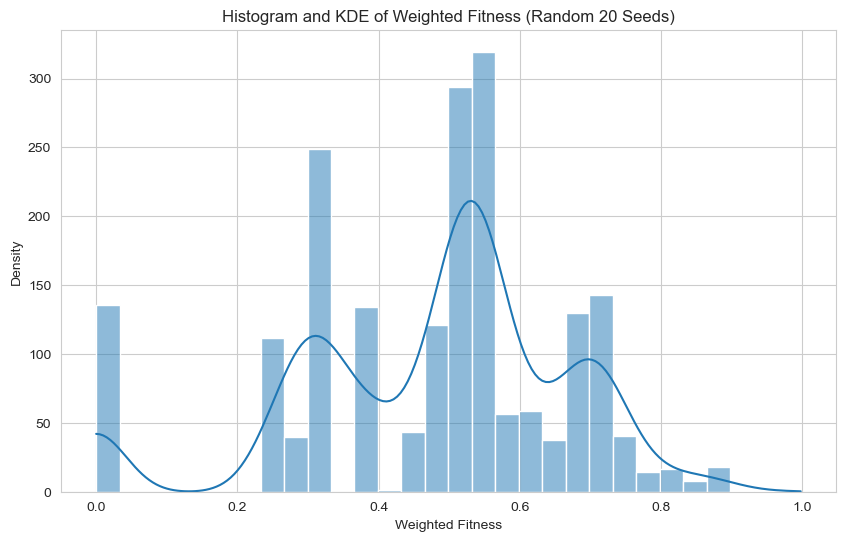

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 랜덤하게 20개의 시드 선택
random_seeds = np.random.choice(data['Seed'].unique(), size=20, replace=False)

# 2. 선택된 시드에 해당하는 데이터 필터링
filtered_data = data[data['Seed'].isin(random_seeds)]

# 3. 시드 내 적합성 분포 (박스 플롯)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Seed', y='Weighted_Fitness', data=filtered_data)
plt.xticks(rotation=90)
plt.title('Boxplot of Weighted Fitness by Randomly Selected 20 Seeds')
plt.xlabel('Seed')
plt.ylabel('Weighted Fitness')
plt.show()

# 4. 시드 간 적합성 분포 (랜덤 20개 시드 히스토그램 및 KDE)
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Weighted_Fitness'], kde=True, bins=30)
plt.title('Histogram and KDE of Weighted Fitness (Random 20 Seeds)')
plt.xlabel('Weighted Fitness')
plt.ylabel('Density')
plt.show()


### **결과 해석**

#### **시드별 적합성 분포**

**그림 1**의 박스 플롯은 랜덤하게 선택된 20개의 시드에 대해 **Weighted Fitness** 값의 분포를 시각적으로 나타낸다. 박스 플롯을 통해 각 시드 내에서 **Weighted Fitness** 값의 변동 폭, 중앙값, 이상치(outliers) 등을 확인할 수 있다. 

박스 플롯에서 확인할 수 있는 주요 특징은 다음과 같다:

- **시드 간 분포 차이**: **시드 9, 53, 60**은 분포 범위가 매우 넓게 나타났으며, 이는 해당 시드에서 **Weighted Fitness** 값이 다양한 범위에 걸쳐 존재함을 나타낸다. 반면, **시드 28, 87, 61**은 상대적으로 좁은 분포를 보이며, 이는 적합성 값이 해당 시드 내에서 비교적 일관되게 나타났음을 시사한다.
  
- **중앙값의 차이**: **시드 7**과 **시드 9**은 중앙값이 약 **0.6** 이상으로 나타났으며, 이는 상대적으로 높은 적합성을 나타내는 반면, **시드 3, 6, 73**은 중앙값이 약 **0.4 이하**로 낮은 값을 보였다.

- **이상치**: **동그라미**로 표시된 값들은 이상치로, 다수의 시드에서 확인된다. 특히, **시드 9, 53, 60**에서 많은 이상치가 발견되었으며, 이는 해당 시드에서 극단적인 적합성 값이 존재함을 의미한다.

따라서, 시드별로 **Weighted Fitness** 값의 분포는 크게 다르며, 일부 시드는 적합성 값의 편차가 매우 큰 반면, 다른 시드는 안정된 분포를 보인다. 특히 이상치의 빈도와 범위는 각 시드의 적합성 값이 얼마나 다양하게 분포할 수 있는지를 시사한다.

---

#### **시드 간 적합성 분포**

**그림 2**는 선택된 20개의 시드에서 **Weighted Fitness** 값의 전체적인 분포를 나타낸 히스토그램과 **커널 밀도 추정(KDE)**을 제공한다. 이 그림을 통해 시드 간의 적합성 값이 어떻게 분포하는지 확인할 수 있다.

주요 특징은 다음과 같다:

- **두 개의 주요 피크**: 분포는 두 개의 주요 피크를 중심으로 형성된다. 첫 번째 피크는 약 **0.2~0.3** 사이에 위치하고 있으며, 두 번째 피크는 **0.6~0.7** 구간에 위치한다. 이는 **Weighted Fitness** 값이 이 두 구간에서 상대적으로 많이 집중되어 있음을 의미한다.

- **분포의 다양성**: 히스토그램은 **Weighted Fitness** 값이 0.0부터 1.0까지 넓은 범위에 걸쳐 퍼져 있음을 보여준다. 특히, **0.6 근처**에서 가장 많은 데이터가 집중되어 있으며, 이는 선택된 시드들에서 대다수의 적합성 값이 이 범위에 속함을 의미한다.

- **왼쪽 꼬리**: 분포의 왼쪽 꼬리가 길게 늘어져 있으며, 이는 일부 시드에서 **Weighted Fitness** 값이 **매우 낮은 값**을 가질 수 있음을 시사한다. 이는 특정 시드에서 성능이 낮은 적합성 값을 가진 사례가 있음을 의미한다.

따라서, 선택된 시드 간의 **Weighted Fitness** 값 분포는 두 개의 주요 피크를 중심으로 형성되었으며, 일부 시드에서는 극단적으로 낮은 값을 가질 수 있다. 이러한 분포는 시드 간 적합성 값이 크게 다를 수 있음을 보여준다.

---

#### **결론**

랜덤하게 선택된 20개의 시드를 분석한 결과, **시드별 적합성 분포**와 **시드 간 적합성 분포**는 큰 변동성을 보였다. **시드별 적합성 분포**에서는 일부 시드에서 **Weighted Fitness** 값이 매우 다양한 범위를 차지했으며, 특히 이상치가 다수 확인되었다. 이는 시드에 따라 적합성 값이 매우 달라질 수 있음을 의미한다. 

반면, **시드 간 적합성 분포**에서는 두 개의 주요 피크를 중심으로 분포가 형성되었으며, 적합성 값이 특정 구간에 많이 몰려 있음을 확인할 수 있었다. 또한, 일부 시드에서는 **Weighted Fitness** 값이 극단적으로 낮은 값으로 나타나, 시드 간 성능 차이가 상당히 클 수 있음을 시사하였다.

이 분석을 통해 시드별 적합성 값의 변동성과, 시드 간 성능의 분포 차이를 명확히 확인할 수 있었다. 이는 시드의 선택이 **Weighted Fitness** 결과에 중요한 영향을 미친다는 결론을 뒷받침한다.

C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


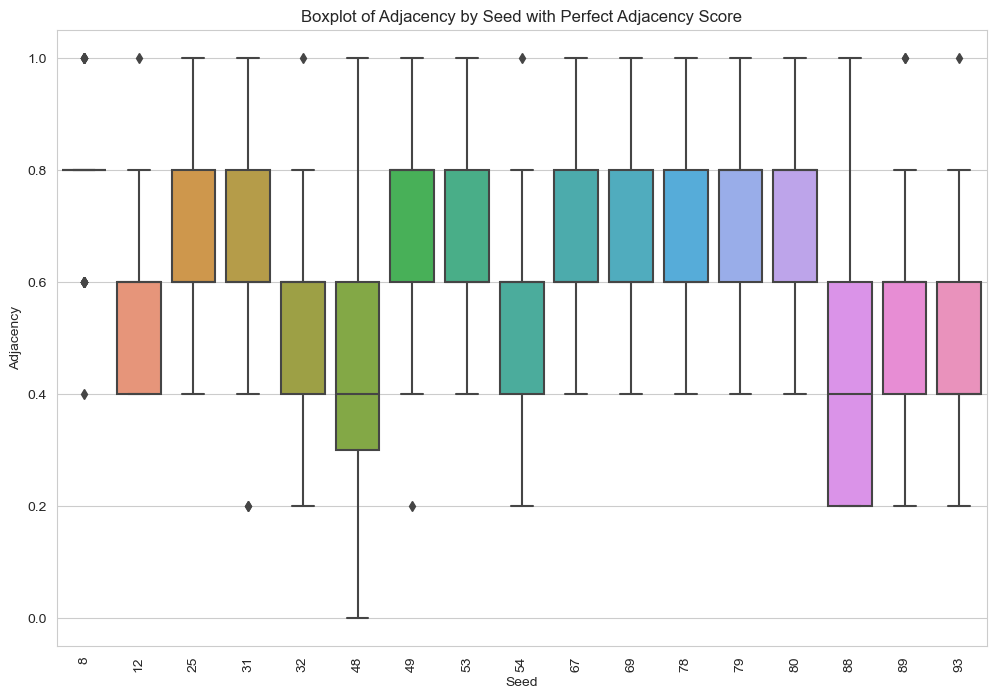

In [25]:
def plot_box(y , data, text = 'Randomly Selected 20 Seed' ):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Seed', y=y, data=data)
    plt.xticks(rotation=90)
    plt.title(f'Boxplot of {y} by {text}')
    plt.xlabel('Seed')
    plt.ylabel(y)
    plt.show()
# seed 중에서 'Adjacency'가 1.0인 데이터를 포함하는 모든 seed
import pandas as pd

# 1. 'Adjacency'가 1.0인 데이터를 포함하는 시드 추출
seeds_with_adjacency_1 = data['Seed'][data['Adjacency'] == 1.0].unique()
# 2. 해당 시드를 포함하는 모든 데이터 필터링
filtered_data_adj_1 = data[data['Seed'].isin(seeds_with_adjacency_1)]

plot_box(y='Adjacency', data= filtered_data_adj_1,text='Seed with Perfect Adjacency Score')

In [18]:
random_seeds = np.random.choice(data['Seed'].unique(), size=20, replace=False)

# 2. 선택된 시드에 해당하는 데이터 필터링
filtered_data = data[data['Seed'].isin(random_seeds)]


C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


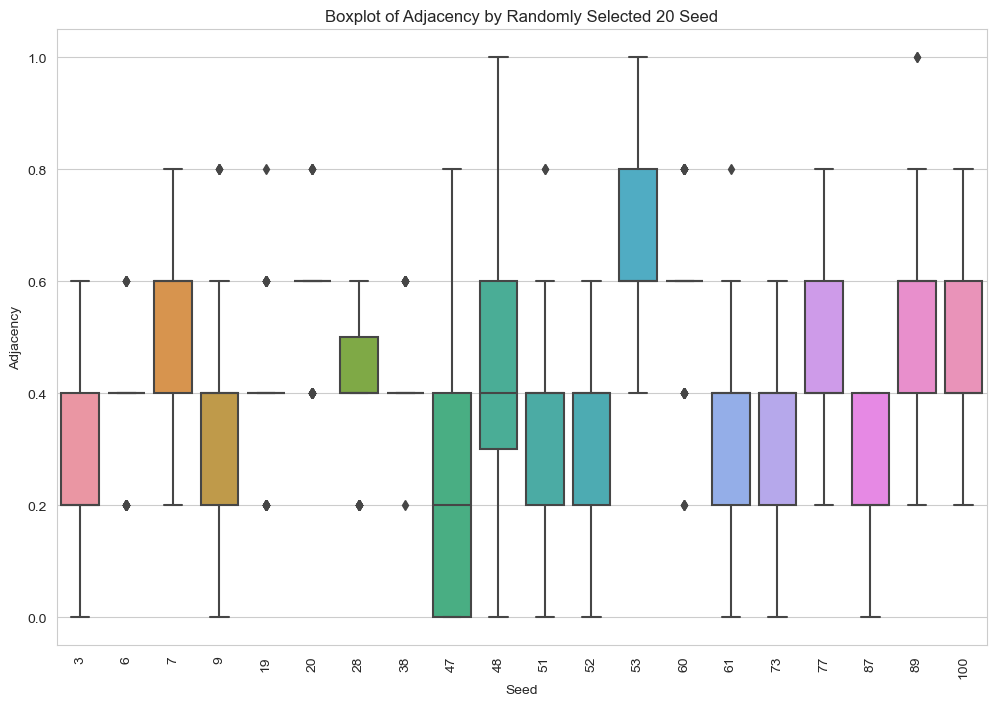

In [26]:
plot_box(y='Adjacency', data= filtered_data)

In [27]:
data.describe()

,Seed,Size_Opt,Adj_Opt,Ori_Opt,Adjacency,Orientation,Size,Simplicity,Rectangularity,Regularity,PA_Ratio,Weighted_Fitness
count,9900.000000,9900.0,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9900.000000,9.900000e+03
mean,50.500000,1.0,0.520000,0.550000,0.453071,0.713207,0.755918,0.721018,0.860572,0.595262,0.800484,4.978152e-01
std,28.867528,0.0,0.499625,0.497519,0.194935,0.300799,0.130246,0.077782,0.049713,0.067629,0.049963,2.035223e-01
min,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.339312,0.483333,0.658048,0.360268,0.593904,2.000000e-09
25%,25.750000,1.0,0.000000,0.000000,0.400000,0.500000,0.658167,0.666667,0.827230,0.549833,0.766699,3.753512e-01
50%,50.500000,1.0,1.000000,1.000000,0.400000,0.750000,0.762563,0.716667,0.861644,0.594591,0.801796,5.254381e-01
75%,75.250000,1.0,1.000000,1.000000,0.600000,1.000000,0.861111,0.770833,0.895426,0.640195,0.836054,6.570404e-01
max,100.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.041915,0.869722,0.949926,1.000000e+00


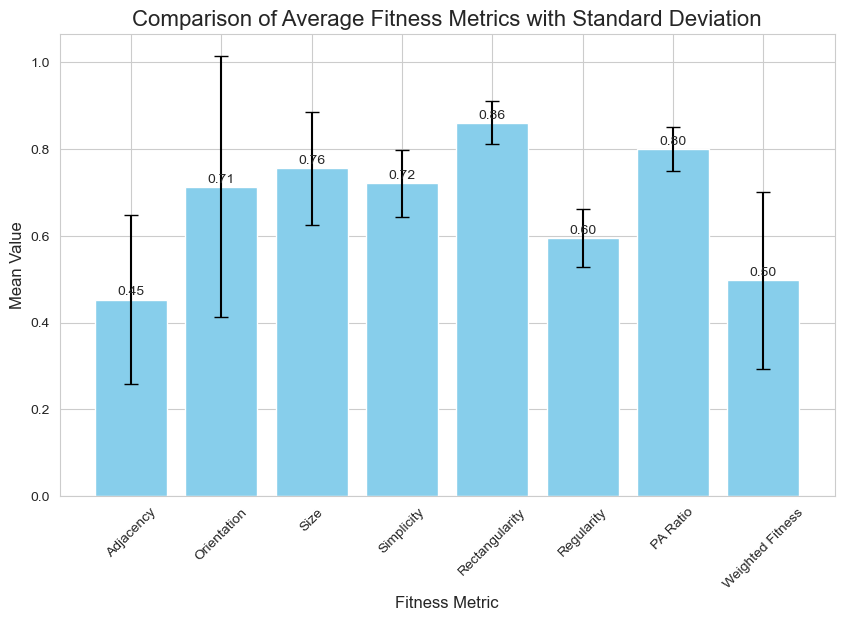

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 각 적합도의 평균과 표준 편차 입력
fitness_means = {
    'Adjacency': 0.453071,
    'Orientation': 0.713207,
    'Size': 0.755918,
    'Simplicity': 0.721018,
    'Rectangularity': 0.860572,
    'Regularity': 0.595262,
    'PA Ratio': 0.800484,
    'Weighted Fitness': 0.4978152
}

fitness_std = {
    'Adjacency': 0.194935,
    'Orientation': 0.300799,
    'Size': 0.130246,
    'Simplicity': 0.077782,
    'Rectangularity': 0.049713,
    'Regularity': 0.067629,
    'PA Ratio': 0.049963,
    'Weighted Fitness': 0.2035223
}

# 2. 플롯 그리기
labels = list(fitness_means.keys())
means = list(fitness_means.values())
std_devs = list(fitness_std.values())

x_pos = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x_pos, means, yerr=std_devs, capsize=5, color='skyblue')

# 3. 제목과 레이블 설정
plt.title('Comparison of Average Fitness Metrics with Standard Deviation', fontsize=16)
plt.xlabel('Fitness Metric', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)

# 4. X축 레이블 추가 및 회전
plt.xticks(x_pos, labels, rotation=45)

# 5. 값 표기 추가
for i, v in enumerate(means):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', fontsize=10)

# 6. 플롯 표시
plt.show()


C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\envs\deep\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

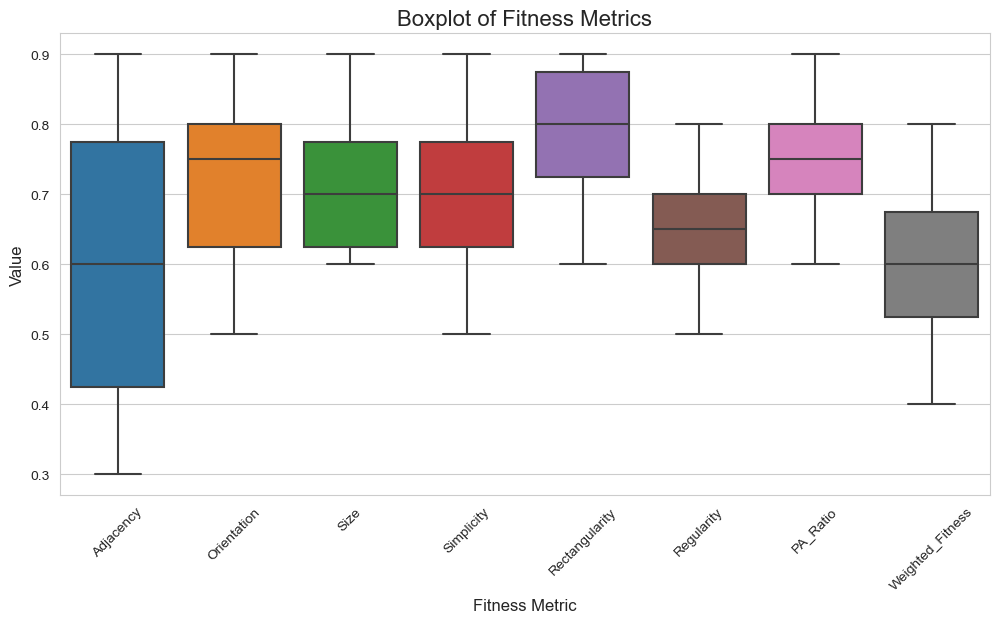

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 가상의 데이터를 사용하여 박스 플롯 예시
# 예시 데이터를 사용하는 경우, 실제 데이터에 맞게 수정할 것
data = pd.DataFrame({
    'Adjacency': [0.3, 0.5, 0.8, 0.9, 0.4, 0.7],
    'Orientation': [0.5, 0.6, 0.8, 0.9, 0.7, 0.8],
    'Size': [0.6, 0.7, 0.8, 0.9, 0.6, 0.7],
    'Simplicity': [0.5, 0.6, 0.7, 0.8, 0.7, 0.9],
    'Rectangularity': [0.7, 0.8, 0.9, 0.9, 0.6, 0.8],
    'Regularity': [0.5, 0.6, 0.7, 0.7, 0.6, 0.8],
    'PA_Ratio': [0.6, 0.7, 0.8, 0.8, 0.7, 0.9],
    'Weighted_Fitness': [0.4, 0.5, 0.6, 0.7, 0.6, 0.8]
})

# 박스 플롯 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Boxplot of Fitness Metrics', fontsize=16)
plt.xlabel('Fitness Metric', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)
plt.show()
